## Data Preprocessing
Data can be obtained by registering on Brain Tumor Segmentation 2019 dataset website at this address "https://www.med.upenn.edu/cbica/brats-2019/". The data should be downloaded and placed where /data in the container is mounted. 

The dataset/preprocess_data.py script will convert the raw data into tfrecord format used for training and evaluation.

In this dastaset, ample multi-institutional routine clinically-acquired pre-operative multimodal MRI scans of glioblastoma (GBM/HGG) and lower grade glioma (LGG), with pathologically confirmed diagnosis and available OS, are provided as the training, validation and testing data for 2019 BraTS challenge. 
By running the next two cells you can see the folders inside the dataset and the files that you can see inside these folders. the format of images is nii.gz. NIfTI is a type of file format for neuroimaging.

In [1]:
! ls /data/MICCAI_BraTS_2019_Data_Training

HGG  LGG  content.json	data_splits  name_mapping.csv  survival_data.csv


In [2]:
! ls /data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1

BraTS19_2013_10_1_flair.nii.gz	BraTS19_2013_10_1_t1ce.nii.gz
BraTS19_2013_10_1_seg.nii.gz	BraTS19_2013_10_1_t2.nii.gz
BraTS19_2013_10_1_t1.nii.gz


## check the image
To check the dataset you can use nibabel. By running the next three cells you can install nibabel using pip install, choose an image from dataset and plot the chosen 3d image from dataset using matplotlib. You can check other images in the dataset by changing the address of image in the code.

In [3]:
 pip install nibabel;

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nibabel as nib
import matplotlib.pyplot as plt


img_arr = nib.load('/data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii.gz').get_data()
# plt.imshow(img_arr)
# plt.pause(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


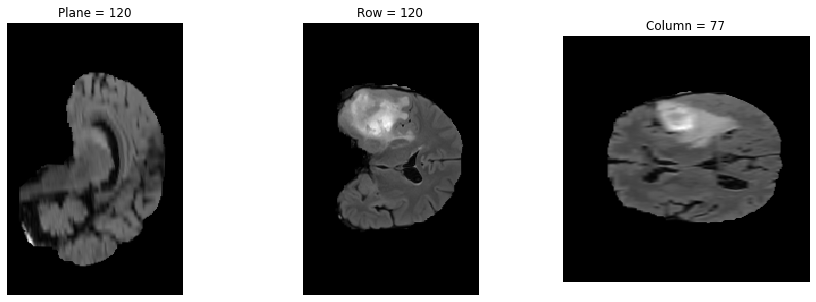

In [7]:
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)
        
(n_plane, n_row, n_col) = img_arr.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, img_arr[n_plane // 2], title=f'Plane = {n_plane // 2}')
show_plane(b, img_arr[:, n_row // 2, :], title=f'Row = {n_row // 2}')
show_plane(c, img_arr[:, :, n_col // 2], title=f'Column = {n_col // 2}')

## preprocess the dataset
In the next cell we used preprocess-data script to preprocess the downloaded dataset. The final format of the processed images is tfrecord. To read data efficiently it can be helpful to serialize your data and store it in a set of files (100–200MB each) that can each be read linearly. This is especially true if the data is being streamed over a network. This can also be useful for caching any data-preprocessing.
The TFRecord format is a simple format for storing a sequence of binary records. Using tfrecords can speed things up especially if the bottleneck of the training is loading the data.

In [8]:
! python dataset/preprocess_data.py -i /data/MICCAI_BraTS_2019_Data_Training -o /data/preprocessed -v

2021-05-03 18:25:01.647501: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
1/84 tfrecord files created
2/84 tfrecord files created
3/84 tfrecord files created
4/84 tfrecord files created
5/84 tfrecord files created
6/84 tfrecord files created
7/84 tfrecord files created
8/84 tfrecord files created
9/84 tfrecord files created
10/84 tfrecord files created
11/84 tfrecord files created
12/84 tfrecord files created
13/84 tfrecord files created
14/84 tfrecord files created
15/84 tfrecord files created
16/84 tfrecord files created
17/84 tfrecord files created
18/84 tfrecord files created
19/84 tfrecord files created
20/84 tfrecord files created
21/84 tfrecord files created
22/84 tfrecord files created
23/84 tfrecord files created
24/84 tfrecord files created
25/84 tfrecord files created
26/84 tfrecord files created
27/84 tfrecord files created
28/84 tfrecord files created
29/84 tfrecord files created
30/84 tfrecord files c

## The result of Preprocessed Script
the next cell shows the result of preprocessed script

In [9]:
! ls /data/preprocessed

volume-0.tfrecord   volume-28.tfrecord	volume-47.tfrecord  volume-66.tfrecord
volume-1.tfrecord   volume-29.tfrecord	volume-48.tfrecord  volume-67.tfrecord
volume-10.tfrecord  volume-3.tfrecord	volume-49.tfrecord  volume-68.tfrecord
volume-11.tfrecord  volume-30.tfrecord	volume-5.tfrecord   volume-69.tfrecord
volume-12.tfrecord  volume-31.tfrecord	volume-50.tfrecord  volume-7.tfrecord
volume-13.tfrecord  volume-32.tfrecord	volume-51.tfrecord  volume-70.tfrecord
volume-14.tfrecord  volume-33.tfrecord	volume-52.tfrecord  volume-71.tfrecord
volume-15.tfrecord  volume-34.tfrecord	volume-53.tfrecord  volume-72.tfrecord
volume-16.tfrecord  volume-35.tfrecord	volume-54.tfrecord  volume-73.tfrecord
volume-17.tfrecord  volume-36.tfrecord	volume-55.tfrecord  volume-74.tfrecord
volume-18.tfrecord  volume-37.tfrecord	volume-56.tfrecord  volume-75.tfrecord
volume-19.tfrecord  volume-38.tfrecord	volume-57.tfrecord  volume-76.tfrecord
volume-2.tfrecord   volume-39.tfrecord	volume-58.tfrecord  volume-

Move some of the preprocessed images to a new folder to use for testing the model. We made a folder called "preprocessed_test" and moved some preprocessed image in that folder. Later we will use this test folder for model prediction. 

## Training using default parameters
After the Docker container is launched, the training of a single fold (fold 0) with the default hyperparameters (for example 1/8 GPUs TF-AMP/FP32/TF32) can be started with:

**bash examples/unet3d_train_single{_TF-AMP}.sh <number/of/gpus> <path/to/dataset> <path/to/checkpoint> <batch/size>**

For example, to run with 32-bit precision (FP32 or TF32) with batch size 2 on 1 GPU, simply use:
**bash examples/unet3d_train_single.sh 1 /data/preprocessed /results 2**

to train a single fold with mixed precision (TF-AMP) with on 8 GPUs batch size 2 per GPU, use:
**bash examples/unet3d_train_single_TF-AMP.sh 8 /data/preprocessed /results 2**


In [11]:
! bash examples/unet3d_train_single_TF-AMP.sh 4 /data/preprocessed /results 2


2021-05-03 18:37:59.636058: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,0]<stderr>:2021-05-03 18:38:02.497590: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,1]<stderr>:2021-05-03 18:38:02.516929: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,2]<stderr>:2021-05-03 18:38:02.532883: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,3]<stderr>:2021-05-03 18:38:02.541710: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,0]<stderr>:WARNING:tensorflow:Deprecation warnings have been disabled. Set TF_ENABLE_DEPRECATION_WARNINGS=1 to re-enable them.
[1,1]<stderr>:WARNING:tensorflow:Deprecation warnings have been disabled. Set TF_ENA

## Benchmarking

### Training Performance Benchmarking
The training performance can be evaluated by using benchmarking scripts, such as:

**bash examples/unet3d_{train,infer}_benchmark{_TF-AMP}.sh <number/of/gpus/for/training> <path/to/dataset> <path/to/checkpoint> <batch/size>**

This script makes the model run and report the performance. For example, to benchmark training with TF-AMP with batch size 2 on 4 GPUs, use:

**bash examples/unet3d_train_benchmark_TF-AMP.sh 4 /data/preprocessed /results 2**



In [13]:
! bash examples/unet3d_train_benchmark_TF-AMP.sh 4 /data/preprocessed /results 2

2021-05-03 19:31:51.277730: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,0]<stderr>:2021-05-03 19:31:53.071617: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,2]<stderr>:2021-05-03 19:31:53.097450: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,1]<stderr>:2021-05-03 19:31:53.097704: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,3]<stderr>:2021-05-03 19:31:53.119685: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
[1,0]<stderr>:WARNING:tensorflow:Deprecation warnings have been disabled. Set TF_ENABLE_DEPRECATION_WARNINGS=1 to re-enable them.
[1,2]<stderr>:WARNING:tensorflow:Deprecation warnings have been disabled. Set TF_ENA

### Inference Performance  Benchmarking

To obtain inference performance with 32-bit precision (FP32 or TF32) with batch size 1, use:
**bash examples/unet3d_infer_benchmark.sh /data/preprocessed /results 1**

In [14]:
! bash examples/unet3d_infer_benchmark.sh /data/preprocessed /results 1

2021-05-03 19:35:35.426331: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


--------------------------------------------------------------------------
[[11104,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: f267448f44e0

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2021-05-03 19:35:39.921035: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-05-03 19:35:39.922901: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x570d860 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-03 19:35:39.922934: I t

## Main.py Script 

To see the full list of available options for main.py use the -h or --help. By running the next cell you can see how to change execute mode and other parameters of this script. You can perform model training, predicting, evaluating and inferenceing using customized hyperparameters using this script. 

In [24]:
! python main.py --help

2021-04-28 20:07:50.657240: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


--------------------------------------------------------------------------
[[8298,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: b09e49533fde

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
usage: main.py [-h] --model_dir MODEL_DIR
               [--exec_mode {train,evaluate,train_and_evaluate,predict,debug_train,debug_predict}]
               [--benchmark] [--max_steps MAX_STEPS]
               [--learning_rate LEARNING_RATE] [--log_every LOG_EVERY]
               [--log_dir LOG_DIR] [--loss {dice,ce,dice+ce}]
        

## Predict
we can use test dataset and  predict as exec-mode to test the model. the result will be saved in model_dir. 

**python main.py --model_dir /results --exec_mode predict --data_dir /data/path to test data**

In [15]:
! python main.py --model_dir /results --exec_mode predict --data_dir /data/preprocessed_test

2021-05-03 19:47:00.780670: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


--------------------------------------------------------------------------
[[10922,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: f267448f44e0

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2021-05-03 19:47:05.006007: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-05-03 19:47:05.007558: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5b664c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-03 19:47:05.007592: I t

## Plotting the Result of Prediction
in the next two cells, we chose one of the results from the results folder and plot it. 


In [60]:
import numpy as np
data= np.load('/results/vol_3.npy')





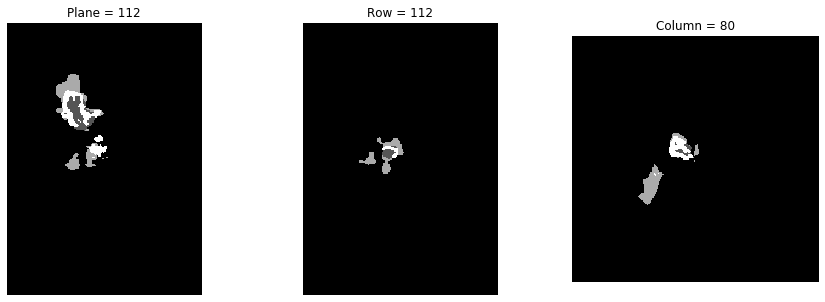

In [61]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)
        
(n_plane, n_row, n_col) = data.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, data[n_plane // 2], title=f'Plane = {n_plane // 2}')
show_plane(b, data[:, n_row // 2, :], title=f'Row = {n_row // 2}')
show_plane(c, data[:, :, n_col // 2], title=f'Column = {n_col // 2}')
